In [1]:
import os
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from time import time

#pytorch
import torch
from torch import nn
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch import optim
#tensorflow
import tensorflow as tf
import PIL
import PIL.Image
import pathlib
from tensorflow.keras import datasets, layers, models, losses, utils, Model
from tensorflow.keras.layers import TimeDistributed, LSTM, Dense
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the produced images and resizing to 33x33 pixels

In [2]:
# output = pd.read_csv('/content/drive/MyDrive/THESIS/9_months/y_district14_9months_new.csv') #y_district14.csv (this is from 5 months 10 am data)
# date_names = output['date'].unique()
# print(output.head(4))
# print('The number of rows in the output: ', len(output))

data_dir = pathlib.Path('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme')  # images (this is from 5 months 10am data)
path_of_images = list(data_dir.glob('*.png'))
print('The number of images: ', len(path_of_images))
print(path_of_images[:10]) # the first 10 path of the images folder

train_paths = path_of_images[:33] #14496
test_paths = path_of_images[33:]
print("The 80 percent of the images for training: ", len(train_paths))
print("The 20 percent of the images for testing: ", len(test_paths))


data_dir = pathlib.Path('/content/drive/MyDrive/THESIS/Producing_15_mins/images_white/images_2022_white')  # images (this is from 5 months 10am data)
path_of_images_white = list(data_dir.glob('*.png'))
print('The number of images: ', len(path_of_images_white))
print(path_of_images[:10]) # the first 10 path of the images folder

train_paths_white = path_of_images_white[:14496] #14496
test_paths_white = path_of_images_white[14496:]
print("The 80 percent of the images for training: ", len(train_paths_white))
print("The 20 percent of the images for testing: ", len(test_paths_white))

The number of images:  40
[PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/2022-01-01 00:00:00.png'), PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/2022-01-01 00:15:00.png'), PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/2022-01-01 00:30:00.png'), PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/2022-01-01 00:45:00.png'), PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/2022-01-01 01:00:00.png'), PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/2022-01-01 01:15:00.png'), PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/2022-01-01 01:30:00.png'), PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/2022-01-01 01:45:00.png'), PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/2022-01-01 02:00:00.png'), PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/

In [ ]:
# reading the modified 6 months time series data:
modified_trafficMAD_urb_2022 = pd.read_csv('/content/drive/MyDrive/THESIS/Producing_15_mins/trafficMAD_ts_urb_2022.csv', header=0)
modified_trafficMAD_urb_2022.dtypes

loc_district       int64
timestamp         object
elem_type         object
Avg_Intensity    float64
latitude         float64
longitude        float64
dtype: object

In [ ]:
import calendar
from datetime import date
# get weekday name
# get day name in english

modified_trafficMAD_urb_2022['timestamp'] = pd.to_datetime(modified_trafficMAD_urb_2022['timestamp'])
type(modified_trafficMAD_urb_2022['timestamp'])
modified_trafficMAD_urb_2022['day name'] = modified_trafficMAD_urb_2022['timestamp'].dt.day_name()

In [ ]:
modified_trafficMAD_urb_2022.head(5)

,loc_district,timestamp,elem_type,Avg_Intensity,latitude,longitude,day name
0,1,2022-01-01 00:00:00,URB,170.406015,40.417075,-3.706335,Saturday
1,1,2022-01-01 00:15:00,URB,150.825758,40.417130,-3.706217,Saturday
2,1,2022-01-01 00:30:00,URB,207.873134,40.417011,-3.706392,Saturday
3,1,2022-01-01 00:45:00,URB,277.559701,40.417054,-3.706267,Saturday
4,1,2022-01-01 01:00:00,URB,336.185185,40.417054,-3.706211,Saturday


In [ ]:
# importing the required module
import matplotlib.pyplot as plt
import plotly.express as px
plt.rcParams["figure.figsize"] = (15,10)

fig = px.line(modified_trafficMAD_urb_2022, x='timestamp', y="Avg_Intensity",
              title='The evaluation of Traffic Intensity for each day',hover_data=["day name"])
fig.update_layout(hovermode="x unified")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

The image of the path: /content/drive/MyDrive/THESIS/Producing_15_mins/images_white/images_2022_white/2022-01-01 00:00:00.png


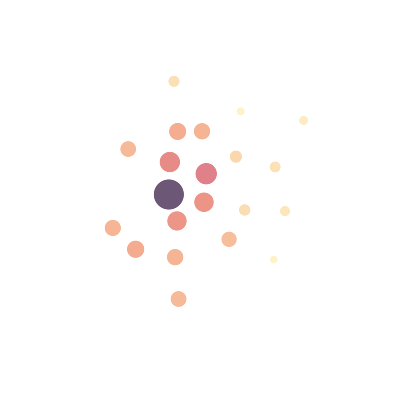

In [ ]:
path_of_images_white.sort()
print(f'The image of the path: {path_of_images_white[0]}')
PIL.Image.open(str(path_of_images_white[0]))

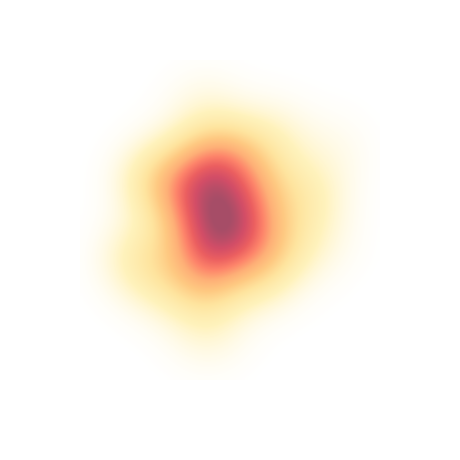

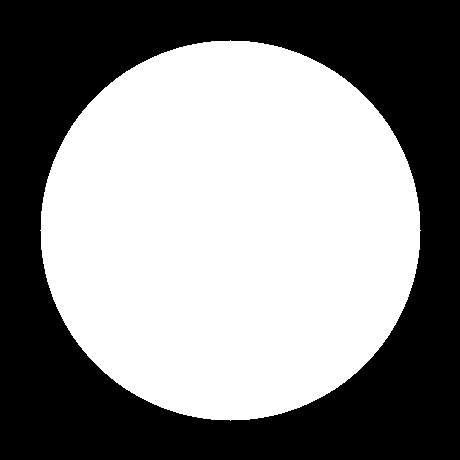

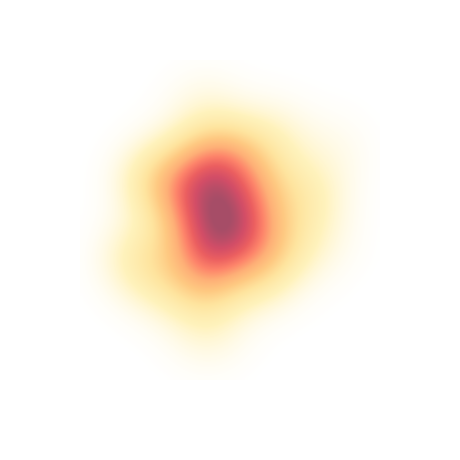

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image, create mask, and draw white circle on mask
image = cv2.imread(str(path_of_images[0]))
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv2.circle(mask, (230, 230), 190, (255,255,255), -1) 

# Mask input image with binary mask
result = cv2.bitwise_and(image, mask)
# Color background white
result[mask==0] = 255 # Optional

cv2_imshow(image)
cv2_imshow(mask)
cv2_imshow(result)
cv2.waitKey()

Creating the dataset

1. Training set - Getting the 33x33 images.

In [ ]:
batch_size = 32  # np.round(len(path_of_images)*0.8) # optimal batch durumuna sonra bak
img_height = 33 
img_width = 33
root_dir = '/content/drive/MyDrive/THESIS/Producing_15_mins/deneme'
train_ds = tf.keras.utils.image_dataset_from_directory(
  root_dir,
  validation_split=0.2,
  #labels=list(output['intensity']),
  subset="training",
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 40 files belonging to 1 classes.
Using 32 files for training.


In [ ]:
train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 33, 33, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Checking if train_ds is a Tensor
res = tf.is_tensor(train_ds.take(1))
  
# Printing the result
print('Result: ', res)

# Transforming to a tensor
arr = tf.is_tensor(train_ds.take(1))
if not tf.is_tensor(arr):
  # Converting to tensor
  arr = tf.convert_to_tensor(arr)

print(tf.is_tensor(arr))

Result:  False
True


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break ## break defined to stop printing after 1 output..

(20, 33, 33, 3)
(20,)


In [ ]:
date_names = modified_trafficMAD_urb_2022['timestamp'].unique()
date_names = date_names[:40]

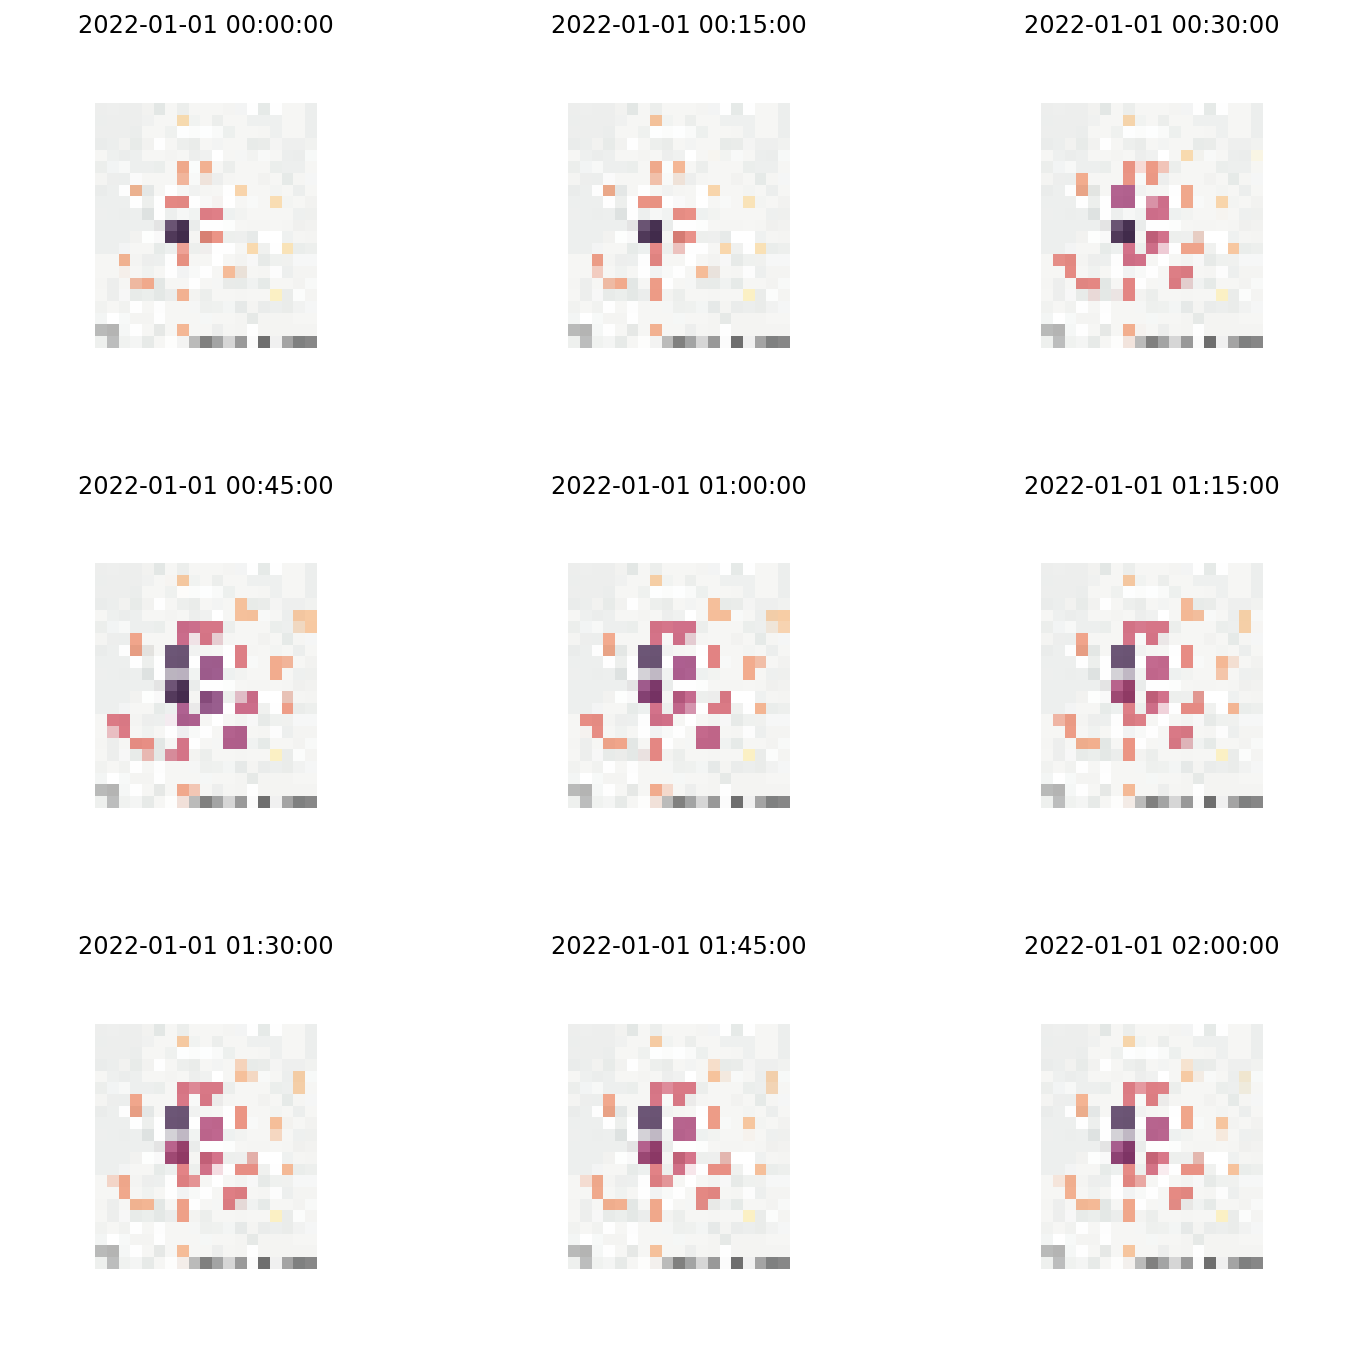

In [ ]:
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(date_names[i])
    #plt.title(date_names[i] + ' \n'+'Intensity of 14= '+str(labels[i].numpy()))
    plt.axis("off")

2. Test set:

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  root_dir,
  validation_split=0.2,
  labels=list(output['intensity']),
  subset="validation",
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 273 files belonging to 1 classes.
Using 54 files for validation.


In [ ]:
all_test_paths = test_ds.file_paths
date_test_list = []
for path in all_test_paths:
  path= path.split("/")[-1]
  date_test = path.partition(".")[0]
  date_test_list =np.append(date_test_list, date_test)
date_test_list

array(['2022-05-08', '2022-05-09', '2022-05-10', '2022-05-11',
       '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-15',
       '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19',
       '2022-05-20', '2022-05-21', '2022-05-22', '2022-05-23',
       '2022-05-24', '2022-05-25', '2022-05-26', '2022-05-27',
       '2022-05-28', '2022-05-29', '2022-05-30', '2022-05-31',
       '2022-06-01', '2022-06-02', '2022-06-03', '2022-06-04',
       '2022-06-05', '2022-06-06', '2022-06-07', '2022-06-08',
       '2022-06-09', '2022-06-10', '2022-06-11', '2022-06-12',
       '2022-06-13', '2022-06-14', '2022-06-15', '2022-06-16',
       '2022-06-17', '2022-06-18', '2022-06-19', '2022-06-20',
       '2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24',
       '2022-06-25', '2022-06-26', '2022-06-27', '2022-06-28',
       '2022-06-29', '2022-06-30'], dtype='<U32')

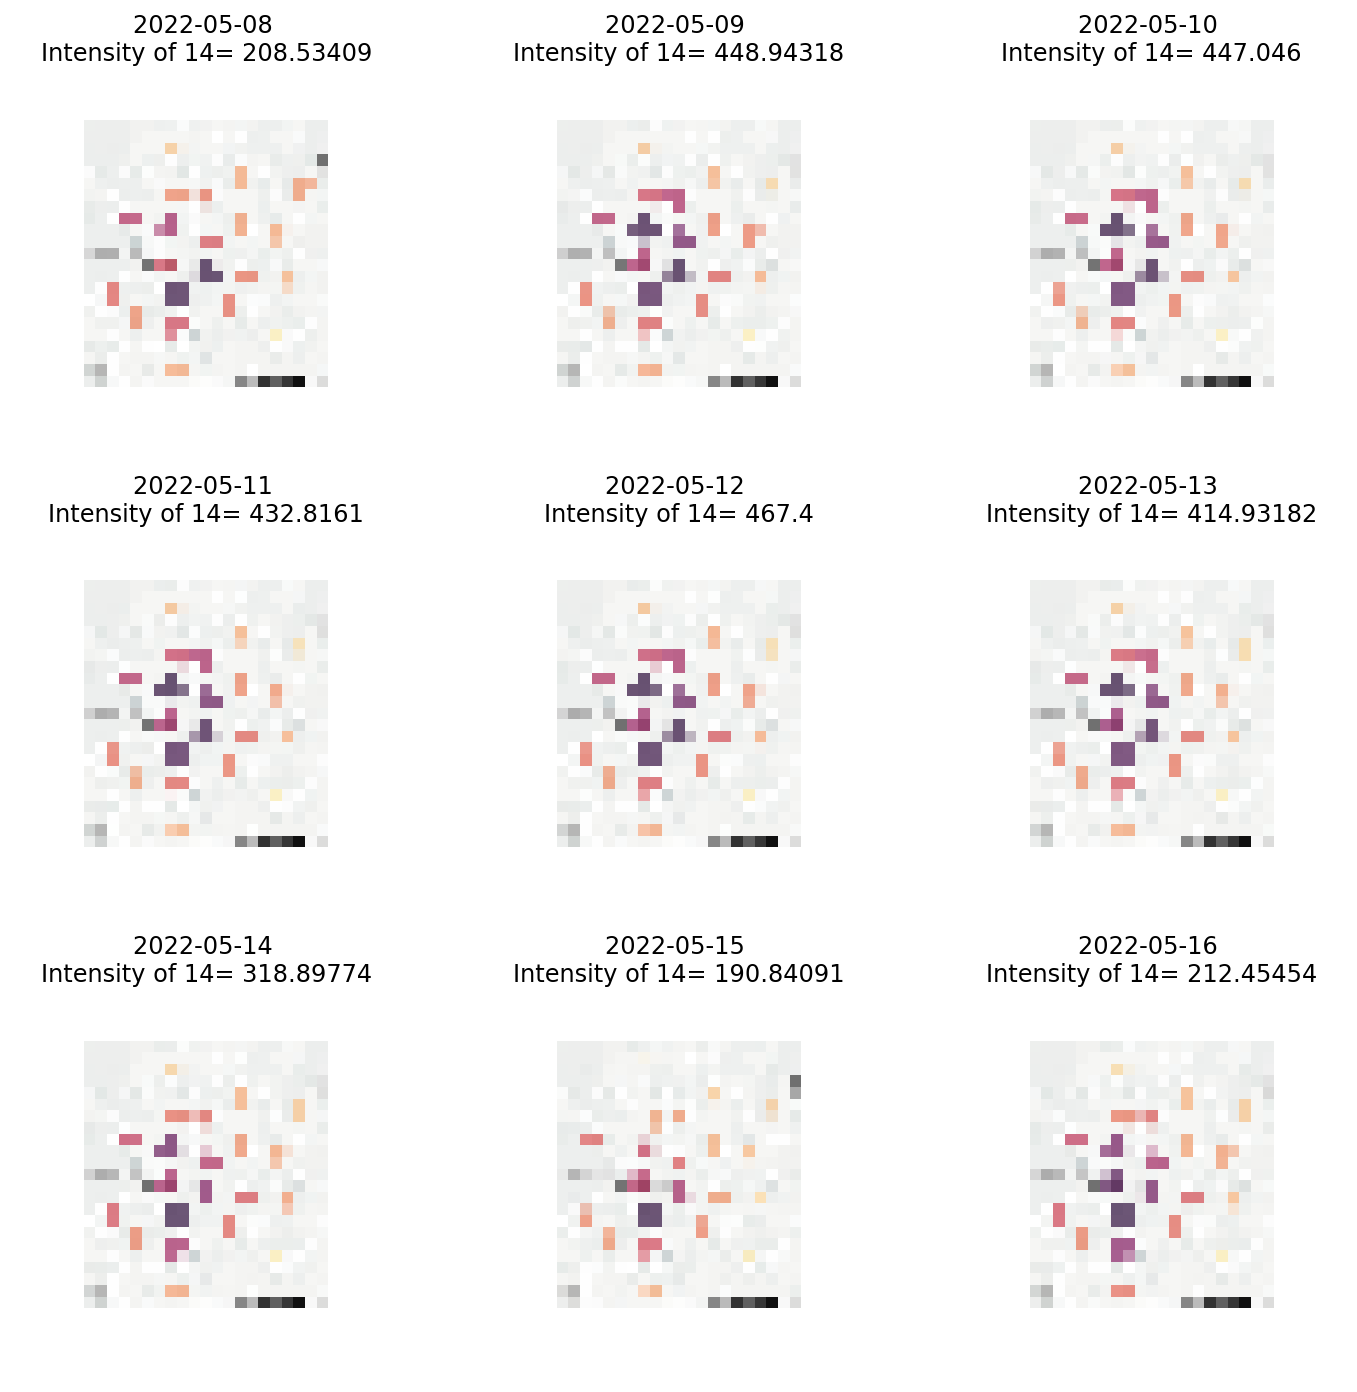

In [ ]:
plt.figure(figsize=(12, 12))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(date_test_list[i] + ' \n'+'Intensity of 14= '+str(labels[i].numpy()))
    plt.axis("off")

# Data Standardization

RGB kanal değerleri [0, 255] aralığındadır. Bu bir sinir ağı için ideal değildir; genel olarak girdi değerlerinizi küçük yapmaya çalışmalısınız.

Burada, tf.keras.layers.Rescaling kullanarak değerleri [0, 1] aralığında olacak şekilde standartlaştıracaksınız:

In [ ]:
# Defining the normalization layer:
normalization_layer = tf.keras.layers.Rescaling(1./255)

# With map function, normalizing every image data in train_ds:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print('Pixel values interval of the first image: ', np.min(first_image), np.max(first_image))
print('Pixel values interval of the second image: ', np.min(image_batch[1]), np.max(image_batch[1]))

Pixel values interval of the first image:  0.064864725 1.0
Pixel values interval of the second image:  0.064864725 1.0


It could be seen that the pixel values of the first image are between 0 and 1. So, the Rescaling layer with 1./255 parameter will be used in the training model to standardize the pixel values of the images.

In [ ]:
'''
def standardize(image_data):
    image_data -= np.mean(image_data, axis=0)
    image_data /= np.std(image_data, axis=0)
    return image_data

#tf.image.per_image_standardization(image)

# With map function, normalizing every image data in train_ds:
normalized_ds = train_ds.map(lambda x, y: (standardize(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print('Pixel values interval of the first image: ', np.min(first_image), np.max(first_image))

## Trial 1 - CNN Implementation:

1. Predicting the district-14 traffic intensity:

## Trying the load_img 

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

t_images = []
for img in train_paths:
  # print(img)
  img = load_img(str(img), target_size=(33, 33), color_mode = "grayscale")
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  t_images.append(img)
train_images = np.vstack(t_images)

te_images = []
for img in test_paths:
  # print(img)
  img = load_img(str(img), target_size=(33, 33), color_mode = "grayscale")
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  te_images.append(img)
test_images = np.vstack(te_images)


# normalize the dataset
# make a copy of dataframe
scaled_features = output.copy()

col_names = ['intensity']
features = scaled_features[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = MinMaxScaler(feature_range=(0, 1)).fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features

Y_train = scaled_features['intensity'][:219]
Y_test = scaled_features['intensity'][219:]

In [ ]:
train_images.shape

(219, 33, 33, 1)

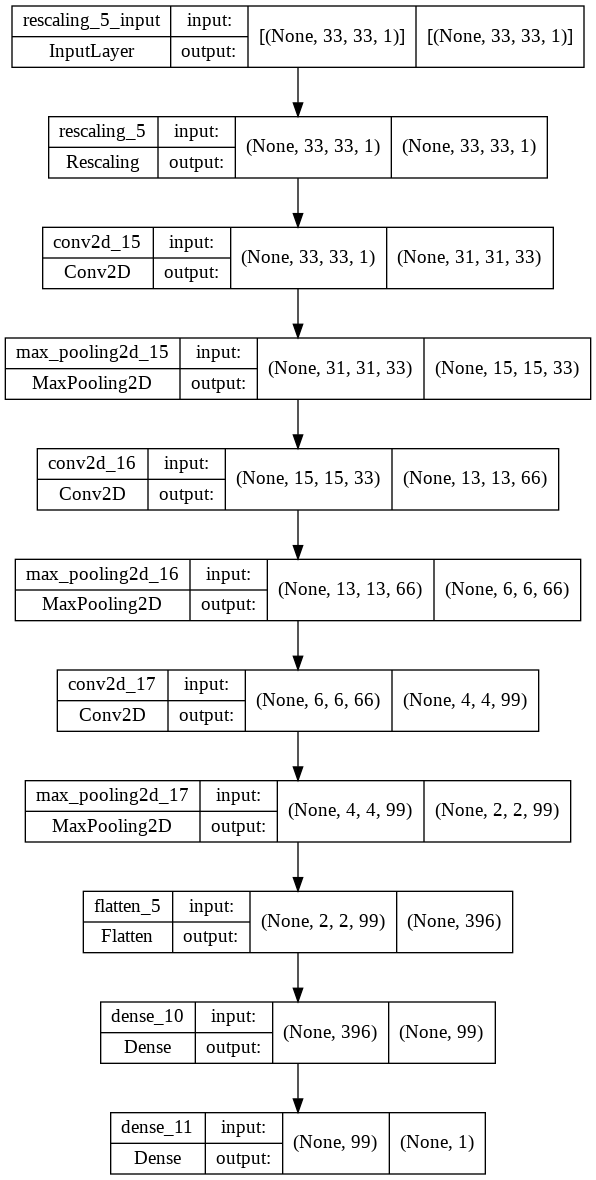

In [ ]:
cnn_model_input_shape = (None, 33,33,1)
cnn_model = tf.keras.Sequential([
                             
    tf.keras.layers.Rescaling(1./255), #To rescale an input in the [0, 255] range to be in the [0, 1] range, you would pass scale=1./255.
    tf.keras.layers.Conv2D(33, (3, 3), activation='relu',input_shape=(33, 33, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(66, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(99, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(99, activation='relu'),
    tf.keras.layers.Dense(1) # there is only one district to predict that is 14..

])

cnn_model.compile(optimizer='adam', loss='mean_squared_error')
cnn_model.build(cnn_model_input_shape)
utils.plot_model(cnn_model, show_shapes=True, show_layer_names=True)

In [ ]:
# early stopping callback, the validation loss for 10 epochs
early_stop_param = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=20, 
                                   restore_best_weights=True)

start = time()

epoches = cnn_model.fit(train_images, Y_train,  #train_ds,
                    # validation_data=test_ds,
                    validation_split=0.3,
                    callbacks=[early_stop_param],
                    epochs=200, 
                    batch_size=20,
                    shuffle=False, # because it is daily data
                    verbose=1)

end = time()

time_cnn = end- start
print('Time consumed while training the model: ', time_cnn)

Epoch 1/200
8/8 [==============================] - 1s 37ms/step - loss: 0.1502 - val_loss: 0.0183
Epoch 2/200
8/8 [==============================] - 0s 23ms/step - loss: 0.0758 - val_loss: 0.0980
Epoch 3/200
8/8 [==============================] - 0s 24ms/step - loss: 0.0392 - val_loss: 0.0558
Epoch 4/200
8/8 [==============================] - 0s 23ms/step - loss: 0.0461 - val_loss: 0.0688
Epoch 5/200
8/8 [==============================] - 0s 23ms/step - loss: 0.0410 - val_loss: 0.0712
Epoch 6/200
8/8 [==============================] - 0s 24ms/step - loss: 0.0418 - val_loss: 0.0632
Epoch 7/200
8/8 [==============================] - 0s 23ms/step - loss: 0.0417 - val_loss: 0.0737
Epoch 8/200
8/8 [==============================] - 0s 25ms/step - loss: 0.0409 - val_loss: 0.0639
Epoch 9/200
8/8 [==============================] - 0s 24ms/step - loss: 0.0417 - val_loss: 0.0724
Epoch 10/200
8/8 [==============================] - 0s 23ms/step - loss: 0.0409 - val_loss: 0.0660
Epoch 11/200
8/8 [=

Last Epoch Training Loss: 0.041222602128982544
Last Epoch Validation Loss: 0.0688035786151886


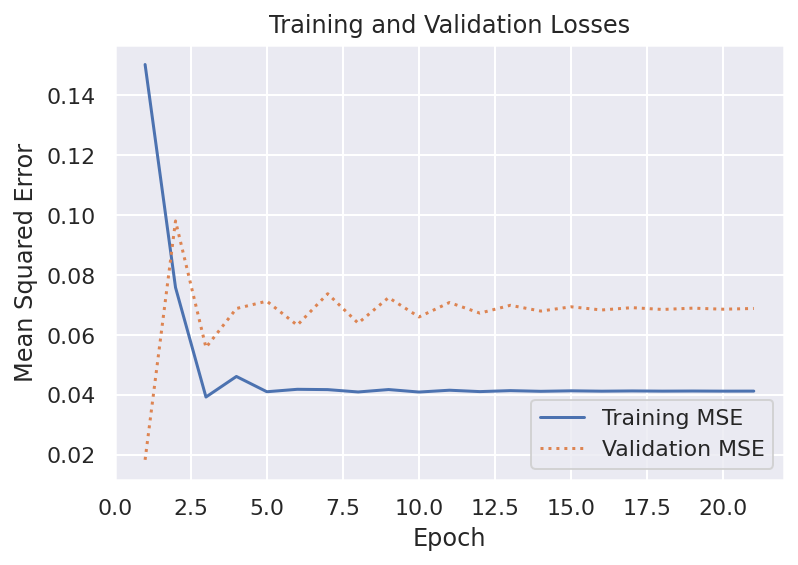

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
sns.set() 
train = epoches.history['loss']
val = epoches.history['val_loss']
epochs = range(1, len(train) + 1)
 
plt.plot(epochs, train, '-', label='Training MSE')
plt.plot(epochs, val, ':', label='Validation MSE')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(loc='lower right')
plt.plot()

print("Last Epoch Training Loss: {}".format(train[-1]))
print("Last Epoch Validation Loss: {}".format(val[-1]))


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# make predictions

trainPredict = cnn_model.predict(train_images)
testPredict = cnn_model.predict(test_images)
# invert predictions

# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([Y_train])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([Y_test])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(Y_test, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.23 RMSE
Test Score: 0.11 RMSE


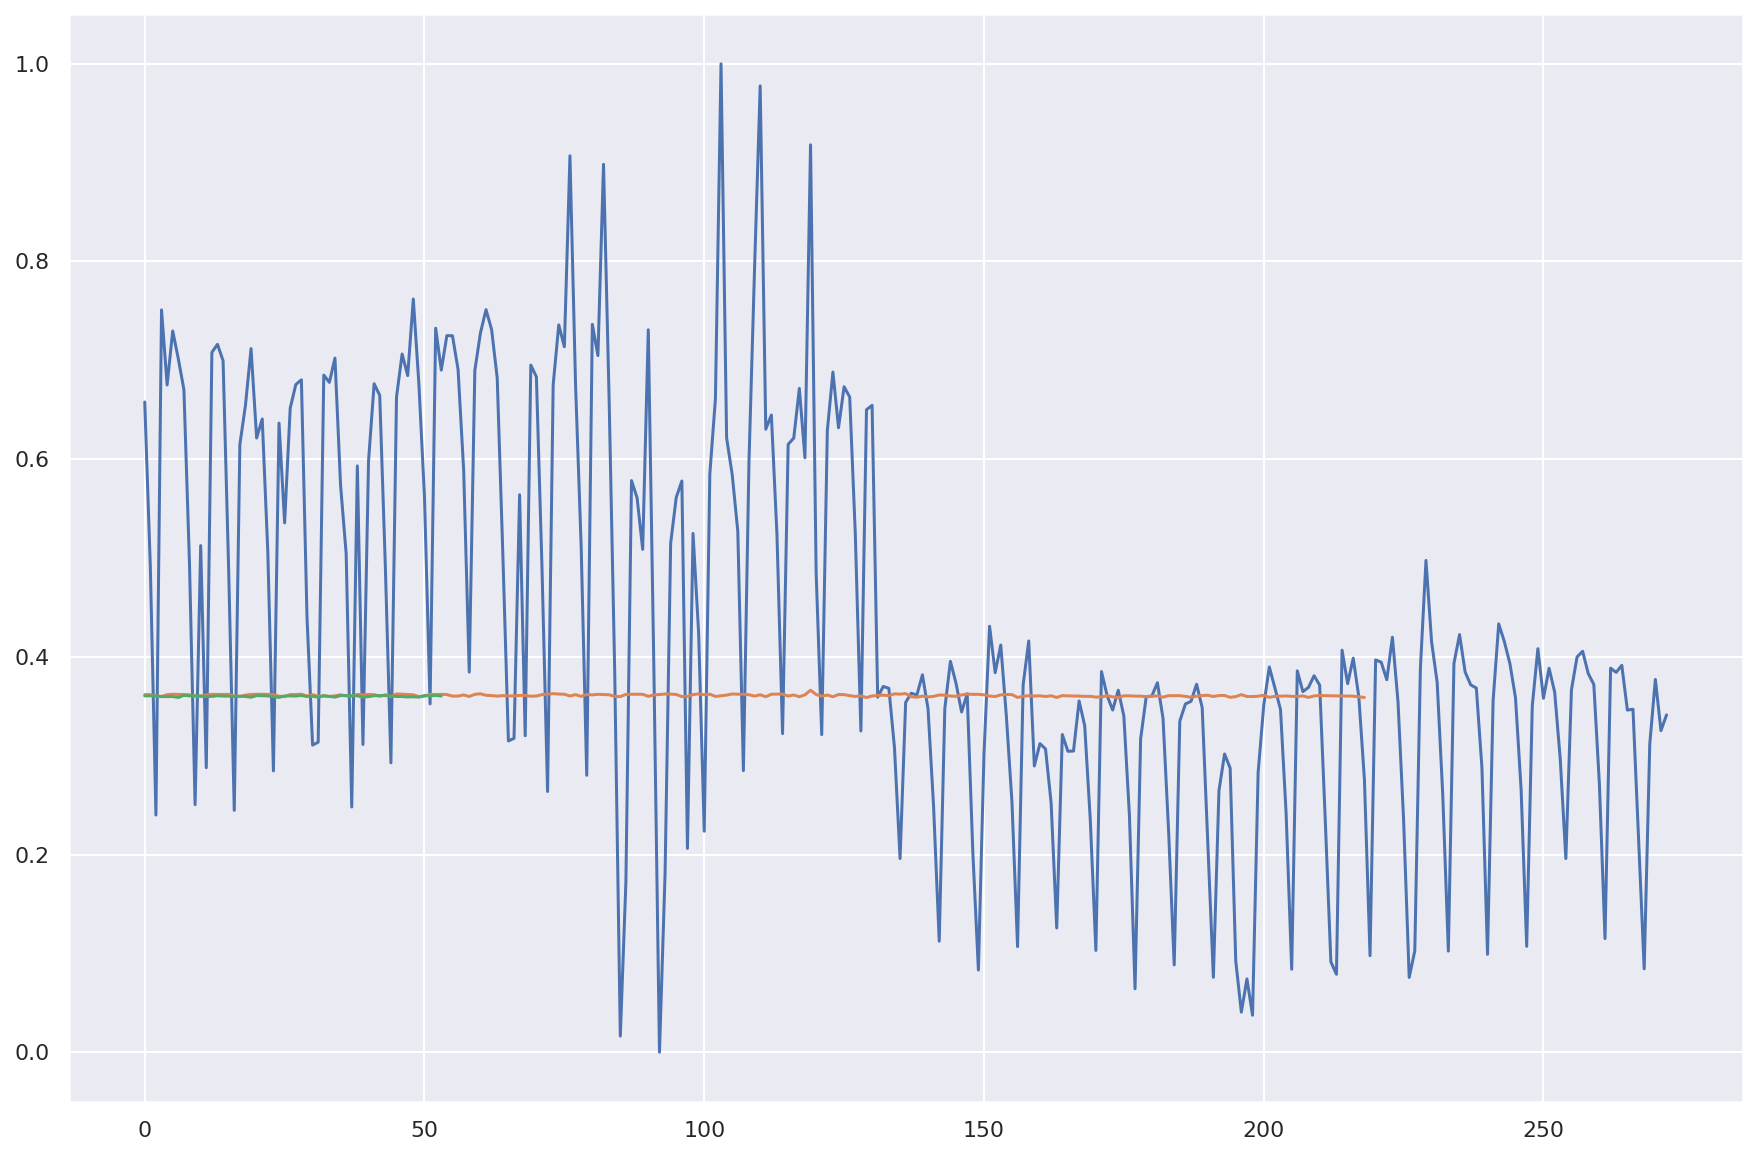

In [ ]:
plt.figure(figsize=(15,10))
look_back = 1
# shift train predictions for plotting
trainPredictPlot = np.empty_like(scaled_features)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(output)
testPredictPlot[:, :] = np.nan
testPredictPlot[219:len(output), :] = testPredict
# plot baseline and predictions
# col_names = ['intensity']
# features = scaled_features[col_names]

# Use scaler of choice; here Standard scaler is used

# features = scaler.inverse_transform(features.values)

# scaled_features[col_names] = features

plt.plot(scaled_features['intensity'])
plt.plot(trainPredict)
plt.plot(testPredict)
plt.show()

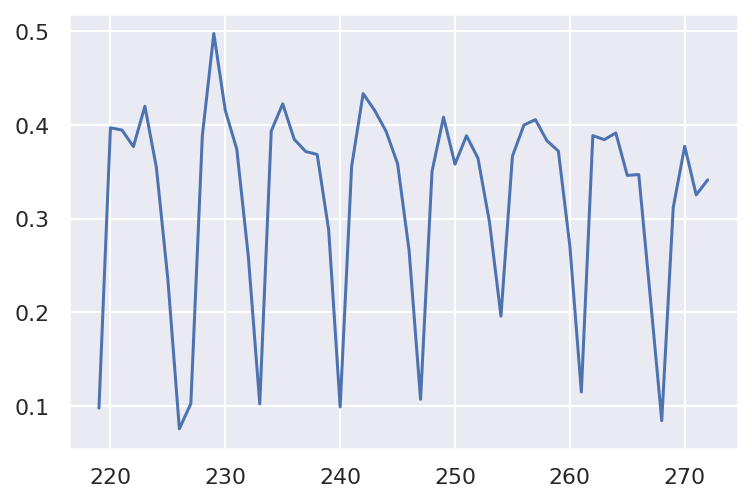

In [ ]:
plt.plot(Y_test)

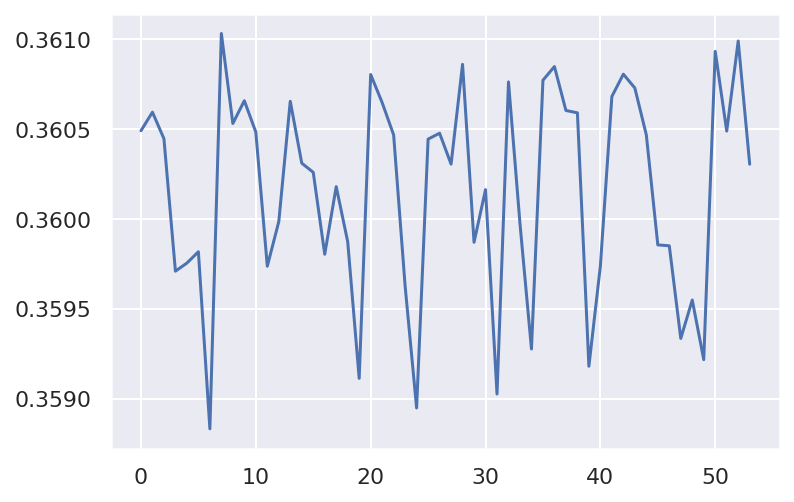

In [ ]:
plt.plot(testPredict)

Modeldeki traning hata oranı hala yüksek, o yüzden underfitting durumu söz konusu, model daha fazla datayla veya parametre değiştirilerek tekrar çalıştırılmalı.

# Adding a LSTM layer:

In [ ]:
def ReshapeLayer(x):
    shape = x.shape #defining the shape of x
    # H,W*channel
    reshape = tf.keras.layers.Reshape((shape[1],shape[2]*shape[3]))(x)
    return reshape

######

input_shape = (None,33,33,3)
cnn_lstm_model = tf.keras.Sequential([
                             
    tf.keras.layers.Rescaling(1./255), #To rescale an input in the [0, 255] range to be in the [0, 1] range, you would pass scale=1./255
    tf.keras.layers.Conv2D(33, (3, 3), activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(66, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(99, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Lambda(ReshapeLayer), # passing from 4D to 3D
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(99, activation='relu', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='relu', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10, activation='relu', return_sequences=True)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)

])

cnn_lstm_model.compile(optimizer='adam', loss='MeanSquaredError')

cnn_lstm_model.build(input_shape) # `input_shape` is the shape of the input data
                         # e.g. input_shape = (None, 32, 32, 3)
cnn_lstm_model.summary()

NameError: ignored

Epoch 1/200
8/8 [==============================] - 8s 150ms/step - loss: 331856.5312 - val_loss: 134835.7500
Epoch 2/200
8/8 [==============================] - 0s 36ms/step - loss: 325879.3438 - val_loss: 106945.6875
Epoch 3/200
8/8 [==============================] - 0s 36ms/step - loss: 178861.0781 - val_loss: 37988.8320
Epoch 4/200
8/8 [==============================] - 0s 35ms/step - loss: 30555.9277 - val_loss: 34831.2422
Epoch 5/200
8/8 [==============================] - 0s 36ms/step - loss: 31229.8652 - val_loss: 44265.5820
Epoch 6/200
8/8 [==============================] - 0s 34ms/step - loss: 26518.0879 - val_loss: 42938.8398
Epoch 7/200
8/8 [==============================] - 0s 35ms/step - loss: 27702.8359 - val_loss: 42052.8047
Epoch 8/200
8/8 [==============================] - 0s 35ms/step - loss: 26769.4844 - val_loss: 44681.8789
Epoch 9/200
8/8 [==============================] - 0s 34ms/step - loss: 27022.6504 - val_loss: 42033.0078
Epoch 10/200
8/8 [======================

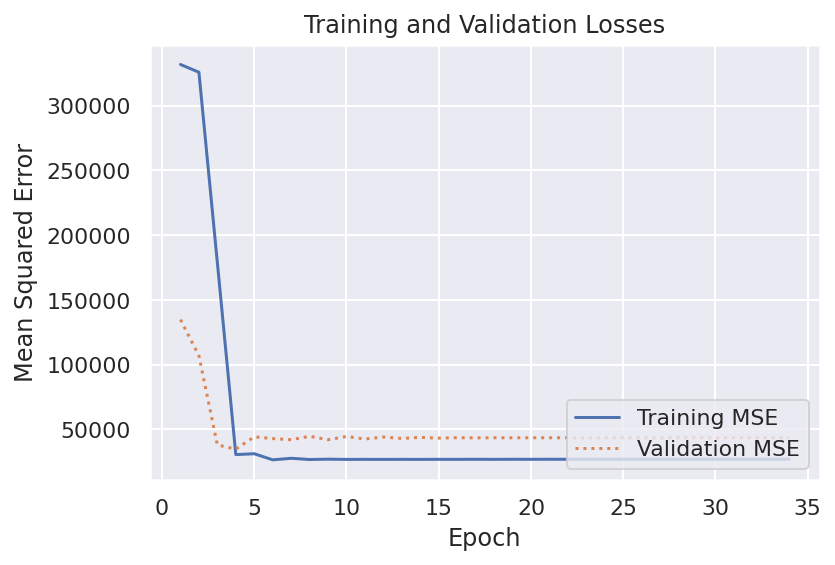

In [ ]:
# early stopping callback, the validation loss for 10 epochs
early_stop_param = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=30, 
                                   restore_best_weights=True)

start = time()

epoches = cnn_lstm_model.fit( train_images, Y_train,#train_ds,
                    # validation_data=test_ds,
                    validation_split=0.3,
                    callbacks=[early_stop_param],
                    epochs=200, 
                    batch_size=20,
                    shuffle=False, # because it is daily data
                    verbose=1)

end = time()

time_cnn = end- start
print('Time consumed while training the model: ', time_cnn)

print('Loss evaluation by Epoch')
sns.set() 
train = epoches.history['loss']
val = epoches.history['val_loss']
epochs = range(1, len(train) + 1)
 
plt.plot(epochs, train, '-', label='Training MSE')
plt.plot(epochs, val, ':', label='Validation MSE')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(loc='lower right')
plt.plot()

print("Last Epoch Training Loss: {}".format(train[-1]))
print("Last Epoch Validation Loss: {}".format(val[-1]))

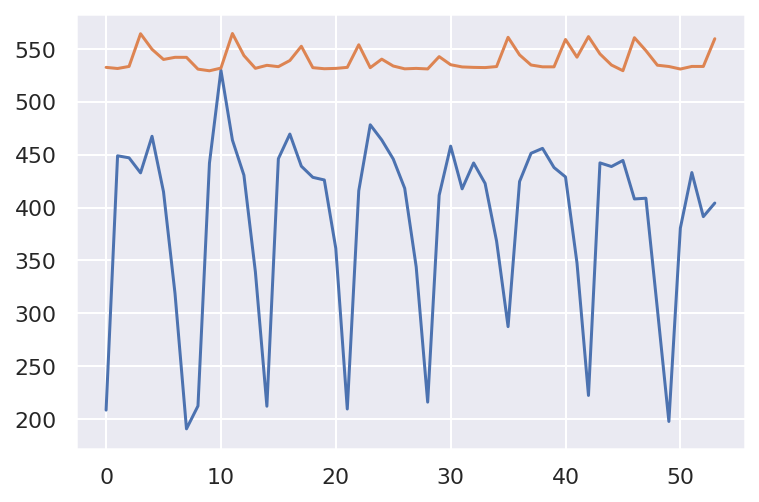

In [ ]:
plt.plot(list(range(0,54)),Y_test)
plt.plot(list(range(0,54)),testPredict)

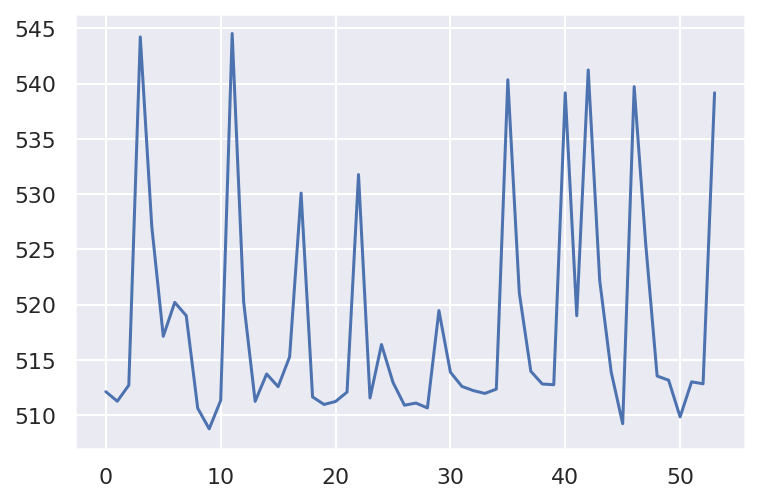

In [ ]:
testPredict = cnn_lstm_model.predict(test_images)
plt.plot(testPredict)

In [ ]:

# make predictions

trainPredict = cnn_model.predict(train_images)
testPredict = cnn_model.predict(test_images)
# invert predictions

# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([Y_train])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([Y_test])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(Y_test, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 173.93 RMSE
Test Score: 174.54 RMSE


# Implementing the LSTM layer after CNN layers with frames:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, utils, applications

#Assuming there are 5 audio files # benim casede audio lar image ler, yani 121
num_audio = 5

data = []

#Create a random number of mel-spectrograms for each audio file
for i in range(num_audio): # 5 tane tensor oluşturuyor.
    n_images = np.random.randint(4,10) # dosya sayısı random atıyor.
    data.append(np.random.random((n_images,128,216,1)))
    
print([i.shape for i in data])

#Convert each set of images (for each audio) to tensors and then a ragged tensor
tensors = [tf.convert_to_tensor(i) for i in data]
X_train = tf.ragged.stack(tensors).to_tensor()

#Creating dummy y_train, one for each audio files
y_train = tf.convert_to_tensor(np.random.randint(0,2,(5,2)))

print(y_train.shape)
print(y_train)

[(6, 128, 216, 1), (7, 128, 216, 1), (7, 128, 216, 1), (4, 128, 216, 1), (8, 128, 216, 1)]
(5, 2)
tf.Tensor(
[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]], shape=(5, 2), dtype=int64)


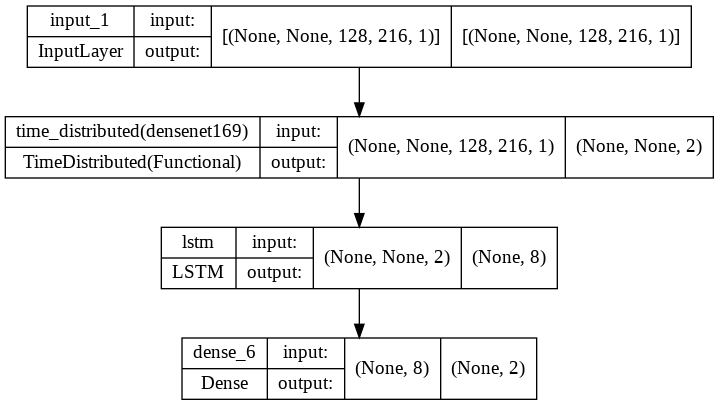

In [ ]:
inp = layers.Input((None,33,33,1), ragged=True)

'''
cnn = tf.keras.Sequential([
                             
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(33, (3, 3), activation='relu',input_shape=(33, 33, 3)), # input for CNN is just the shape of the image.
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(66, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(99, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten()
])

'''

cnn = tf.keras.applications.DenseNet169(include_top=True, 
                                                weights=None, 
                                                input_tensor=None, 
                                                input_shape=(128,216,1), #<----- input shape for cnn is just the image
                                                pooling=None, classes=2)

x = layers.TimeDistributed(cnn)(inp)
x = layers.LSTM(8)(x)
out = layers.Dense(2)(x)

model = Model(inp, out)
model.compile(optimizer='adam', loss='MeanSquaredError')

utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(X_train, y_train, epochs=2)

Epoch 1/2
1/1 [==============================] - 88s 88s/step - loss: 0.7639
Epoch 2/2
1/1 [==============================] - 34s 34s/step - loss: 0.6556


In [ ]:
# early stopping callback, the validation loss for 10 epochs
early_stop_param = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=20, 
                                   restore_best_weights=True)

start = time()

epoches = model.fit(train_ds,
                    validation_data=test_ds,
                    #callbacks=[early_stop_param],
                    epochs=200, 
                    #batch_size=None,
                    #shuffle=False, # because it is daily data
                    verbose=1)

end = time()

time_cnn = end- start
print('Time consumed while training the model: ', time_cnn)
print("Model:")

Epoch 1/200


ValueError: ignored

# Trial 2 - CNN with Lenet-5 Network


In [ ]:
batch_size = 20
img_height = 32
img_width = 32
root_dir = '/content/drive/MyDrive/THESIS'
train_ds = tf.keras.utils.image_dataset_from_directory(
  root_dir,
  validation_split=0.2,
  labels=list(output['intensity']),
  subset="training",
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 151 files belonging to 1 classes.
Using 121 files for training.


In [ ]:
train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  root_dir,
  validation_split=0.2,
  labels=list(output['intensity']),
  subset="validation",
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 151 files belonging to 1 classes.
Using 30 files for validation.


In the CNN network above there are 2 convolutional layers with the following properties:

ReLU activation functions are used as non-linear functions Maxpooling with 2× 2 kernels is used to reduce the spatial dimension in both layers. 5×5 convolutional filters are used. Stride is 1. After the second convolutional layer, three dense layers are stacked. Each of dimension in CIFAR-10 images are composed by 3 input color maps, therefore, they are 32×32×3.

In [ ]:
from tensorflow.keras import datasets, layers, models, losses
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='relu', input_shape=(32, 32, 3))) # assigning 6 feature maps and 5x5 kernel size
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(16, 5, activation='relu')) #assigning 16 feature maps
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(120, 5, activation='relu')) # feature map: 120
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='relu')) # feature map: 84
model.add(layers.Dense(1, activation='softmax'))
model.summary()


model.compile(optimizer='adam', loss='MeanSquaredError')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_2 (Flatten)         (None, 120)              

LeNet has a pretty simple architecture. There are 3 convolutional layers each having 5 by 5 kernels with 6, 16, and 120 feature maps, respectively. In between, there are 2 subsampling layers as average pooling. All these 5 layers use stride 1 and average pooling layers use 2 by 2 kernels as default settings. After the convolutional layers, hyperbolic tangent nonlinear activation is used, whereas subsampling layers are followed by sigmoid nonlinearity. After the last convolutional layer, the activations are flattened and fed into fully connected layers having 84 and 10 neurons. The output of the last layer (after softmax operation) represents the probabilities of the classes (from 0 to 9) for the input image.

Nowadays, tanh and sigmoid activations are rarely used due to saturation problems. Instead, ReLU and Leaky ReLU are much more popular. Also, using two consecutive 3 by 3 layers instead of a single 5 by 5 layer is more preferable, since the same receptive field size is obtained by a fairly lower number of trainable parameters.

Epoch 1/200
7/7 [==============================] - 1s 137ms/step - loss: 210207.0156 - val_loss: 156870.0625
Epoch 2/200
7/7 [==============================] - 1s 118ms/step - loss: 210207.0156 - val_loss: 156870.0625
Epoch 3/200
7/7 [==============================] - 1s 121ms/step - loss: 210207.0156 - val_loss: 156870.0625
Epoch 4/200
7/7 [==============================] - 1s 128ms/step - loss: 210207.0156 - val_loss: 156870.0625
Epoch 5/200
7/7 [==============================] - 1s 127ms/step - loss: 210207.0156 - val_loss: 156870.0625
Epoch 6/200
7/7 [==============================] - 1s 124ms/step - loss: 210207.0156 - val_loss: 156870.0625
Epoch 7/200
7/7 [==============================] - 1s 123ms/step - loss: 210207.0156 - val_loss: 156870.0625
Epoch 8/200
7/7 [==============================] - 1s 132ms/step - loss: 210207.0156 - val_loss: 156870.0625
Epoch 9/200
7/7 [==============================] - 1s 127ms/step - loss: 210207.0156 - val_loss: 156870.0625
Epoch 10/200
7/7 [=

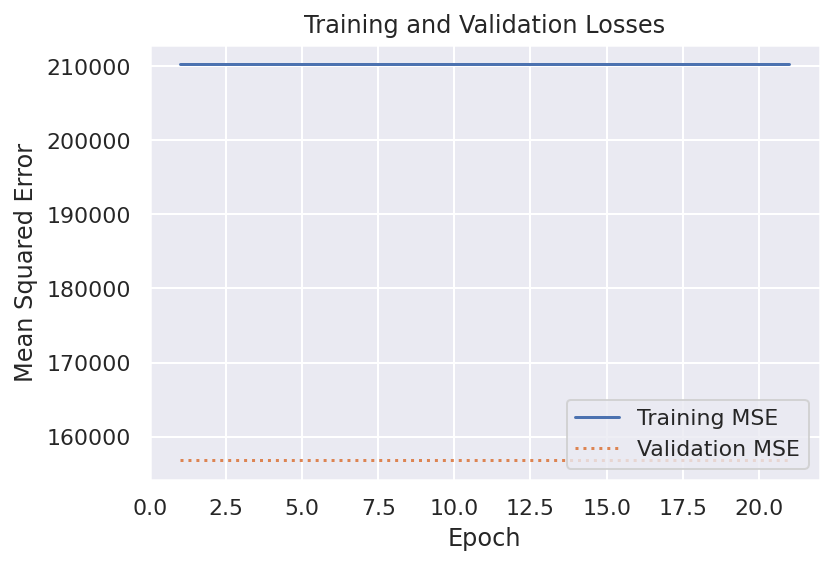

In [ ]:
# early stopping callback, the validation loss for 10 epochs
early_stop_param = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=20, 
                                   restore_best_weights=True)

start = time()

epoches = model.fit(train_ds,
                    validation_data=test_ds,
                    #validation_split=0.2,
                    callbacks=[early_stop_param],
                    epochs=200, 
                    batch_size=20,
                    shuffle=False, # because it is daily data
                    verbose=1)

end = time()

time_cnn = end- start
print('Time consumed while training the model: ', time_cnn)
print("Model:")
model.summary()

sns.set() 
train = epoches.history['loss']
val = epoches.history['val_loss']
epochs = range(1, len(train) + 1)
 
plt.plot(epochs, train, '-', label='Training MSE')
plt.plot(epochs, val, ':', label='Validation MSE')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(loc='lower right')
plt.plot()

print("Last Epoch Training Loss: {}".format(train[-1]))
print("Last Epoch Validation Loss: {}".format(val[-1]))


# Trial 3 - VGG16 Net Architecture:


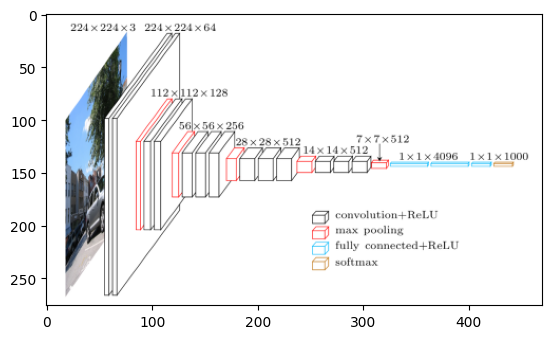




In [6]:
# CNN-based feature extraction using the VGG16 network

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model

# Dimensions of the input image
HOR_SIZE_CNN = 224
VER_SIZE_CNN = 224

# Load CNN model
model = VGG16()
# Remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

# output = pd.read_csv('/content/drive/MyDrive/THESIS/Producing_15_mins/trafficMAD_ts_urb_2022.csv')
# date_names = output['date'].unique()
# Y_train = output['Avg_Intensity']

data_dir = pathlib.Path('/content/drive/MyDrive/THESIS/Producing_15_mins/images_white/images_2022_white')  # images (this is from 5 months 10am data)
path_of_images_white = list(data_dir.glob('*.png'))
path_of_images_white.sort()
print('The number of images: ', len(path_of_images_white))
print(path_of_images[:10]) # the first 10 path of the images folder

train_paths_white = path_of_images_white[:14496] #14496
test_paths_white = path_of_images_white[14496:]
print("The 80 percent of the images for training: ", len(train_paths_white))
print("The 20 percent of the images for testing: ", len(test_paths_white))

'''
# Getting the output and images paths
# The target continous variable
output = pd.read_csv('/content/drive/MyDrive/THESIS/y_district14.csv')
date_names = output['date'].unique()
Y_train = output['intensity'][:121]
Y_test = output['intensity'][121:]
print(output.head(4))
print('The number of rows in the output: ', len(output))
 

# The image paths
data_dir = pathlib.Path('/content/drive/MyDrive/THESIS/images') 
path_of_images = list(data_dir.glob('*.png'))
print('The number of images: ', len(path_of_images))
path_of_images[:10] # the first 10 path of the images folder
print("")
train_paths = path_of_images[:121]
test_paths = path_of_images[121:]
print("The 80 percent of the images for training: ", len(train_paths))
print("The 20 percent of the images for testing: ", len(test_paths))
'''

The number of images:  17376
[PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/2022-01-01 00:00:00.png'), PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/2022-01-01 00:15:00.png'), PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/2022-01-01 00:30:00.png'), PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/2022-01-01 00:45:00.png'), PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/2022-01-01 01:00:00.png'), PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/2022-01-01 01:15:00.png'), PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/2022-01-01 01:30:00.png'), PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/2022-01-01 01:45:00.png'), PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/deneme/2022-01-01 02:00:00.png'), PosixPath('/content/drive/MyDrive/THESIS/Producing_15_mins/deneme/dene

'\n# Getting the output and images paths\n# The target continous variable\noutput = pd.read_csv(\'/content/drive/MyDrive/THESIS/y_district14.csv\')\ndate_names = output[\'date\'].unique()\nY_train = output[\'intensity\'][:121]\nY_test = output[\'intensity\'][121:]\nprint(output.head(4))\nprint(\'The number of rows in the output: \', len(output))\n \n\n# The image paths\ndata_dir = pathlib.Path(\'/content/drive/MyDrive/THESIS/images\') \npath_of_images = list(data_dir.glob(\'*.png\'))\nprint(\'The number of images: \', len(path_of_images))\npath_of_images[:10] # the first 10 path of the images folder\nprint("")\ntrain_paths = path_of_images[:121]\ntest_paths = path_of_images[121:]\nprint("The 80 percent of the images for training: ", len(train_paths))\nprint("The 20 percent of the images for testing: ", len(test_paths))\n'

In [14]:
########################################
# Feature extraction for the training set
print("CNN Features of Training Images:")
print("")
Xtrain_CNN = []
for i in range(0, len(train_paths_white)):
   image_name = train_paths_white[i]
   
   # Load an image from file
   x = load_img(image_name, target_size=(HOR_SIZE_CNN, VER_SIZE_CNN))
   # Convert the image pixels to a numpy array
   x = img_to_array(x)
  #  print('The shape of the loaded image array: ', x.shape)
   # Reshape data for the model
   x = np.expand_dims(x, axis=0)
   # Prepare the image for the VGG model
   x = preprocess_input(x)
 	 
   #  print(x.shape, end="\r")
   # Get CNN features
   features = model.predict(x)
   
   # Update the data
   Xtrain_CNN.append(features)

print(f"Train images-CNN features are extracted successfully for {i+1} images!")
Xtrain_CNN = np.squeeze(np.array(Xtrain_CNN))
print('Size of CNN features for the training set', np.shape(Xtrain_CNN))

print("")


#####################################
# Feature extraction for the test set

print("CNN Features of Testing Images:")
Xtest_CNN = []
for i in range(0, len(test_paths_white)):
   image_name = test_paths_white[i]
  #  print(image_name, end="\r")
   
   # Load an image from file
   x = load_img(image_name, target_size=(HOR_SIZE_CNN, VER_SIZE_CNN))
   # Convert the image pixels to a numpy array
   x = img_to_array(x)
   # Reshape data for the model
   x = np.expand_dims(x, axis=0)
   # Prepare the image for the VGG model
   x = preprocess_input(x)
 	 
   # Get CNN features
   features = model.predict(x)
   
   # Update the data
   Xtest_CNN.append(features)

print(f"Test images-CNN features are extracted successfully for {i+1} images!")
Xtest_CNN = np.squeeze(np.array(Xtest_CNN))
print('Size of CNN features for the test set', np.shape(Xtest_CNN))


CNN Features of Training Images:

Train images-CNN features are extracted successfully for 14496 images!
Size of CNN features for the training set (14496, 4096)

CNN Features of Testing Images:
Test images-CNN features are extracted successfully for 2880 images!
Size of CNN features for the test set (2880, 4096)


Possible question: Why are you changing to the tensors here?

In [30]:
Xtrain_CNN.shape

(14496, 4096)

In [33]:
type(Xtrain_CNN)
Xtrain_CNN_reshaped = np.expand_dims(Xtrain_CNN, axis=-1)
print(Xtrain_CNN_reshaped.shape)

Xtrain_CNN_tensor = tf.convert_to_tensor(Xtrain_CNN_reshaped)
print(Xtrain_CNN_tensor.shape)

# Y_train_reshaped = np.expand_dims(Y_train,axis=-1)
# print(Y_train_reshaped.shape)


# Y_train_tensor = tf.convert_to_tensor(Y_train_reshaped)
# print(Y_train_tensor.shape)
####
'''
Xtest_CNN_reshaped = np.expand_dims(Xtest_CNN, axis=0)
print(Xtest_CNN_reshaped.shape)

Y_test_reshaped = np.expand_dims(Y_test, axis=0)
print(Y_test_reshaped.shape)

Xtest_CNN_tensor = tf.convert_to_tensor(Xtest_CNN_reshaped)
print(Xtest_CNN_tensor.shape)

Y_test_tensor = tf.convert_to_tensor(Y_test_reshaped)
print(Y_test_tensor.shape)
'''

(14496, 4096, 1)
(14496, 4096, 1)


'\nXtest_CNN_reshaped = np.expand_dims(Xtest_CNN, axis=0)\nprint(Xtest_CNN_reshaped.shape)\n\nY_test_reshaped = np.expand_dims(Y_test, axis=0)\nprint(Y_test_reshaped.shape)\n\nXtest_CNN_tensor = tf.convert_to_tensor(Xtest_CNN_reshaped)\nprint(Xtest_CNN_tensor.shape)\n\nY_test_tensor = tf.convert_to_tensor(Y_test_reshaped)\nprint(Y_test_tensor.shape)\n'

In [ ]:
Xtrain_CNN.shape
tf.keras.layers.Lambda(ReshapeLayer)

In [18]:
# reading the modified 6 months time series data:
modified_trafficMAD_urb_2022 = pd.read_csv('/content/drive/MyDrive/THESIS/Producing_15_mins/trafficMAD_ts_urb_2022.csv', header=0)
modified_trafficMAD_urb_2022.dtypes

loc_district       int64
timestamp         object
elem_type         object
Avg_Intensity    float64
latitude         float64
longitude        float64
dtype: object

In [26]:
districts_pivot = pd.pivot_table(modified_trafficMAD_urb_2022, values='Avg_Intensity', index=['timestamp'], columns=['loc_district'])
districts_pivot_3_5 =  districts_pivot[[3, 5]]
districts_pivot_3_5.columns = ['dist-3','dist-5']


In [27]:
import plotly
import plotly.express as px
import plotly.graph_objects as go

districts_pivot_3_5.reset_index(inplace=True)
districts_pivot_3_5['timestamp'] = pd.to_datetime(districts_pivot_3_5['timestamp'])
trace1 = go.Scatter(
 x = districts_pivot_3_5['timestamp'],
 y = districts_pivot_3_5["dist-3"],
 mode = 'lines',
 name = 'district-3'
)
trace2 = go.Scatter(
 x = districts_pivot_3_5['timestamp'],
 y = districts_pivot_3_5["dist-5"],
 mode = 'lines',
 name = 'district-5'
)


layout = go.Layout(
 title = "Traffic Intensity of Districts",
 xaxis = {"title" : "Date"},
 yaxis = {"title" : "Traffic Intensity"}
)
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
from datetime import datetime
train_test_split = datetime.strptime('2022-06-01 00:00:00', '%Y-%m-%d %H:%M:%S')
# end = datetime.strptime('2022-06-30 23:45:00', '%Y-%m-%d %H:%M:%S')
# districts_pivot_3_5 = districts_pivot_3_5.iloc[:, :2]
df_train = districts_pivot_3_5.loc[districts_pivot_3_5['timestamp'] < train_test_split]
df_test = districts_pivot_3_5.loc[districts_pivot_3_5['timestamp'] >= train_test_split]
# and then normalize the data between 0 and 1 before training

from sklearn.preprocessing import MinMaxScaler
dist_list = [i for i in districts_pivot_3_5.columns if i != 'timestamp']
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(df_train[dist_list])
scaled_test = scaler.transform(df_test[dist_list])
scaled_train.shape, scaled_test.shape

((14496, 2), (2880, 2))

In [ ]:
def split_sequence(sequence, look_back, forecast_horizon):
 X, y = list(), list()
 for i in range(len(sequence)): 
   lag_end = i + look_back
   forecast_end = lag_end + forecast_horizon
   if forecast_end > len(sequence):
     break
   seq_x, seq_y = sequence[i:lag_end], sequence[lag_end:forecast_end]
   X.append(seq_x)
   y.append(seq_y)

 return np.array(X), np.array(y)


# Take into consideration last 6 hours, and perform forecasting for next 1 hour
LOOK_BACK = 4*6
FORECAST_RANGE = 4
n_features = len(dist_list)
X_train,_  = split_sequence(Xtrain_CNN_reshaped, look_back=LOOK_BACK, forecast_horizon=FORECAST_RANGE)
X_test,_ = split_sequence(Xtest_CNN, look_back=LOOK_BACK, forecast_horizon=FORECAST_RANGE)
print(X_train.shape)
print(X_test.shape)

_, y_train  = split_sequence(scaled_train, look_back=LOOK_BACK, forecast_horizon=FORECAST_RANGE)
_, y_test = split_sequence(scaled_test, look_back=LOOK_BACK, forecast_horizon=FORECAST_RANGE)

print(y_train.shape)
print(y_test.shape)

In [ ]:
# define a sequential model
def ReshapeLayer(x):
    shape = x.shape #defining the shape of x
    # H,W*channel
    reshape = tf.keras.layers.Reshape((shape[1],shape[2]))(x)
    return reshape

######

input_shape  = (None,4096)
lstm_model = tf.keras.models.Sequential([ 
      tf.keras.layers.Rescaling(1./255),
      tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(1)
  ]) 


lstm_model.compile(optimizer='adam', loss='MeanSquaredError')
lstm_model.build(input_shape)
lstm_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 4096)              0         
                                                                 
 lambda_5 (Lambda)           (None, 4096, 1)           0         
                                                                 
 bidirectional_14 (Bidirecti  (None, 4096, 256)        133120    
 onal)                                                           
                                                                 
 bidirectional_15 (Bidirecti  (None, 128)              164352    
 onal)                                                           
                                                                 
 dense_16 (Dense)            (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)               

In [ ]:
# early stopping callback, the validation loss for 10 epochs
early_stop_param = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=20, 
                                   restore_best_weights=True)

start = time()

epoches = lstm_model.fit(Xtrain_CNN, Y_train,
                    #validation_data=(Xtest_CNN, Y_test),
                    validation_split=0.2,
                    callbacks=[early_stop_param],
                    epochs=200, 
                    batch_size=20,
                    shuffle=False, # because it is daily data
                    verbose=1)

end = time()

time_cnn = end- start
print('Time consumed while training the model: ', time_cnn)

print('Loss evaluation by Epoch')
sns.set() 
train = epoches.history['loss']
val = epoches.history['val_loss']
epochs = range(1, len(train) + 1)
 
plt.plot(epochs, train, '-', label='Training MSE')
plt.plot(epochs, val, ':', label='Validation MSE')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(loc='lower right')
plt.plot()

print("Last Epoch Training Loss: {}".format(train[-1]))
print("Last Epoch Validation Loss: {}".format(val[-1]))

Epoch 1/200
11/11 [==============================] - 122s 10s/step - loss: 272380.9062 - val_loss: 152626.1406
Epoch 2/200
11/11 [==============================] - 104s 10s/step - loss: 264295.9688 - val_loss: 146627.1250
Epoch 3/200
11/11 [==============================] - 106s 10s/step - loss: 255472.2031 - val_loss: 140253.5938
Epoch 4/200
11/11 [==============================] - 105s 10s/step - loss: 247934.6719 - val_loss: 134147.6562
Epoch 5/200
11/11 [==============================] - 105s 10s/step - loss: 239539.0156 - val_loss: 127662.6172
Epoch 6/200
11/11 [==============================] - 104s 9s/step - loss: 230962.9531 - val_loss: 120760.2344
Epoch 7/200
11/11 [==============================] - 105s 10s/step - loss: 223638.7188 - val_loss: 113366.9297
Epoch 8/200
11/11 [==============================] - 107s 10s/step - loss: 210711.9844 - val_loss: 105634.7812
Epoch 9/200
11/11 [==============================] - 105s 10s/step - loss: 201645.6406 - val_loss: 97703.1875
Epo

KeyboardInterrupt: ignored

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 121, 4096)]       0         
                                                                 
 conv1d_12 (Conv1D)          (None, 121, 32)           131104    
                                                                 
 lstm_15 (LSTM)              (None, 121, 64)           24832     
                                                                 
 dense_17 (Dense)            (None, 121, 1)            65        
                                                                 
Total params: 156,001
Trainable params: 156,001
Non-trainable params: 0
_________________________________________________________________


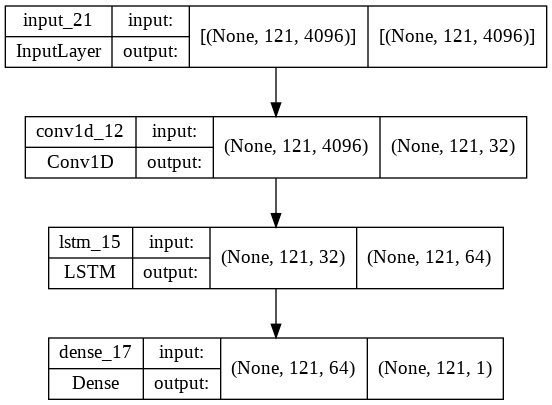

In [ ]:
from keras.layers import Input, Dense, LSTM, MaxPooling1D, Conv1D
from keras.models import Model

input_layer = Input(shape=(121, 4096))
conv1 = Conv1D(filters=32,
               kernel_size=1,
               strides=1,
               activation='tanh',
               padding='same')(input_layer)
lstm1 = LSTM(64, return_sequences=True)(conv1)
output_layer = Dense(1, activation='sigmoid')(lstm1)
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='MeanSquaredError')
model.summary()
utils.plot_model(model, show_shapes=True, show_layer_names=True)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1, 224, 224, 3)]  0         
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 4096)          117479232 
 tributed)                                                       
                                                                 
 lstm_2 (LSTM)               (None, 256)               4457472   
                                                                 
 dense_4 (Dense)             (None, 1024)              263168    
                                                                 
 dense_5 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 122,200,897
Trainable params: 4,721,665
Non-trainable params: 117,479,232
_____________________________________

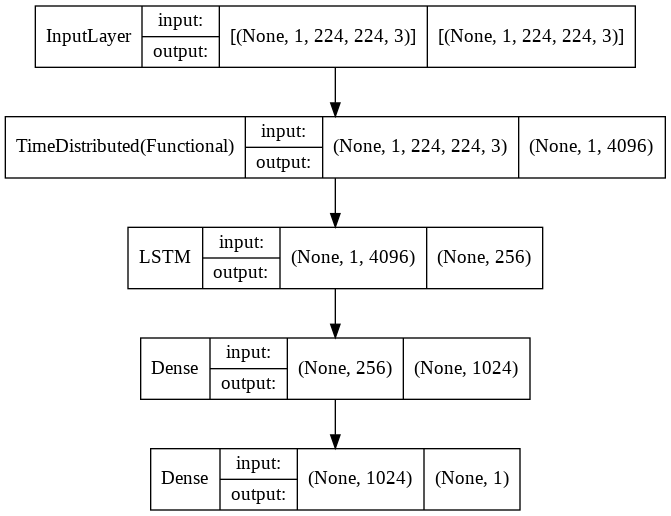

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Input, Flatten
from keras.layers.pooling import GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed


frames,channels, rows, columns = 1,3,224,224 # frame is 1 bcz there is one district to predict..

video = Input(shape=(frames,
                     rows,
                     columns,
                     channels))
cnn_base = VGG16(input_shape=(rows,
                              columns,
                              channels),
                 weights="imagenet",
                 include_top=True) #<=== include_top=True
cnn_base.trainable = False

cnn = Model(cnn_base.input, cnn_base.layers[-3].output) # -3 is the 4096 layer
encoded_frames = TimeDistributed(cnn)(video)
encoded_sequence = LSTM(256)(encoded_frames)
hidden_layer = Dense(1024, activation="relu")(encoded_sequence)
outputs = Dense(1, activation="relu")(hidden_layer)

model = Model(video, outputs)
model.summary()

model.compile(optimizer='adam', loss='MeanSquaredError')

utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
'''
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
ext_tree = ExtraTreesRegressor()

ext_tree.fit(Xtrain_CNN, Y_train)
y_pred = ext_tree.predict(Xtest_CNN)

mse = mean_squared_error(Y_test, y_pred)
print(mse)
'''

2438.6047253495417


In [ ]:
serie_size =  Xtrain_CNN.shape[0] # 121
n_features =  Xtrain_CNN.shape[1] # 4096

epochs = 20
batch = 128
lr = 0.0001

lstm_model = models.Sequential()
lstm_model.add(LSTM(serie_size, input_shape=(serie_size, n_features), return_sequences=True))
lstm_model.add(LSTM(6, activation='relu', return_sequences=True))
lstm_model.add(LSTM(1, activation='relu'))
lstm_model.add(Dense(10, kernel_initializer='glorot_normal', activation='relu'))
lstm_model.add(Dense(10, kernel_initializer='glorot_normal', activation='relu'))
lstm_model.add(Dense(1))
lstm_model.summary()

lstm_model.compile(optimizer='adam', loss='MeanSquaredError')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 121, 121)          2041512   
                                                                 
 lstm_16 (LSTM)              (None, 121, 6)            3072      
                                                                 
 lstm_17 (LSTM)              (None, 1)                 32        
                                                                 
 dense_15 (Dense)            (None, 10)                20        
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,044,757
Trainable params: 2,044,757
No

In [ ]:
Y_train.shape

(121,)

In [ ]:
lstm_history = model.fit(Xtrain_CNN, Y_train, 
                              validation_data=(Xtest_CNN, Y_test), 
                              batch_size=5, 
                              epochs=epochs)

Epoch 1/20


ValueError: ignored